# General Visualization

In [1]:
# --- Packages ---
## General Packages
import pandas as pd
import xarray as xr
import numpy as np
import os
import ipynbname

## GeoCAT
import geocat.comp as gccomp
import geocat.viz as gv
import geocat.viz.util as gvutil

## Visualization
import cmaps  
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import shapely.geometry as sgeom

## MatPlotLib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.ticker import MultipleLocator


In [2]:
# --- Automated output filename ---
def get_filename():
    try:
        # Will fail when __file__ is undefined (e.g., in notebooks)
        filename = os.path.splitext(os.path.basename(__file__))[0]
    except NameError:
        try:
            # Will fail during non-interactive builds
            import ipynbname
            nb_path = ipynbname.path()
            filename = os.path.splitext(os.path.basename(str(nb_path)))[0]
        except Exception:
            # Fallback during Jupyter Book builds or other headless execution
            filename = "template_timeseries_bar"
    return filename

fnFIG = get_filename() + ".png"
print(f"Figure filename: {fnFIG}")

Figure filename: template_viz_general-v01.png


In [3]:
# --- DATA ANALYSIS ---

# Replace this block
ystr, yend = 1950, 2020
years = np.arange(ystr, yend + 1)
values = np.random.randn(len(years))  # or use np.random.rand() for [0, 1] range
dat = xr.DataArray(values, coords={"year": years},
    dims=["year"], name="dummy data")
print(dat)


<xarray.DataArray 'dummy data' (year: 71)> Size: 568B
array([ 0.21610964, -0.86138697, -0.09680619, -1.42171594,  0.39868023,
       -1.99708816, -1.26349698,  0.81172284,  0.2450246 ,  0.37706817,
        1.49678708, -1.33041263, -1.92598362, -0.54267682, -0.79637906,
       -1.35676993,  0.88043127, -1.36030775,  0.58507424,  0.60663814,
       -2.09887288, -0.4689676 , -0.59931988,  0.37738197,  0.89035094,
       -0.60706086,  0.68522436,  1.00497008, -0.6260095 ,  0.42999829,
       -0.73022495, -0.70372628, -2.49298599,  0.97232841,  0.48615232,
        0.42853391, -0.90166535,  0.04150874,  1.43062281, -0.23927687,
       -0.60305057,  0.48115577,  2.22162291, -1.59437924, -0.79243806,
        0.42359079,  0.62358932, -0.06444123, -0.42176683, -0.57880443,
       -0.80788697,  1.32649027,  0.88547661, -1.36709448,  0.08458676,
        0.3100735 , -0.97158437,  0.65923029,  1.36266593,  1.82917059,
        0.91490557, -0.9397016 , -1.5669784 ,  1.11858583, -1.80854656,
       -1.

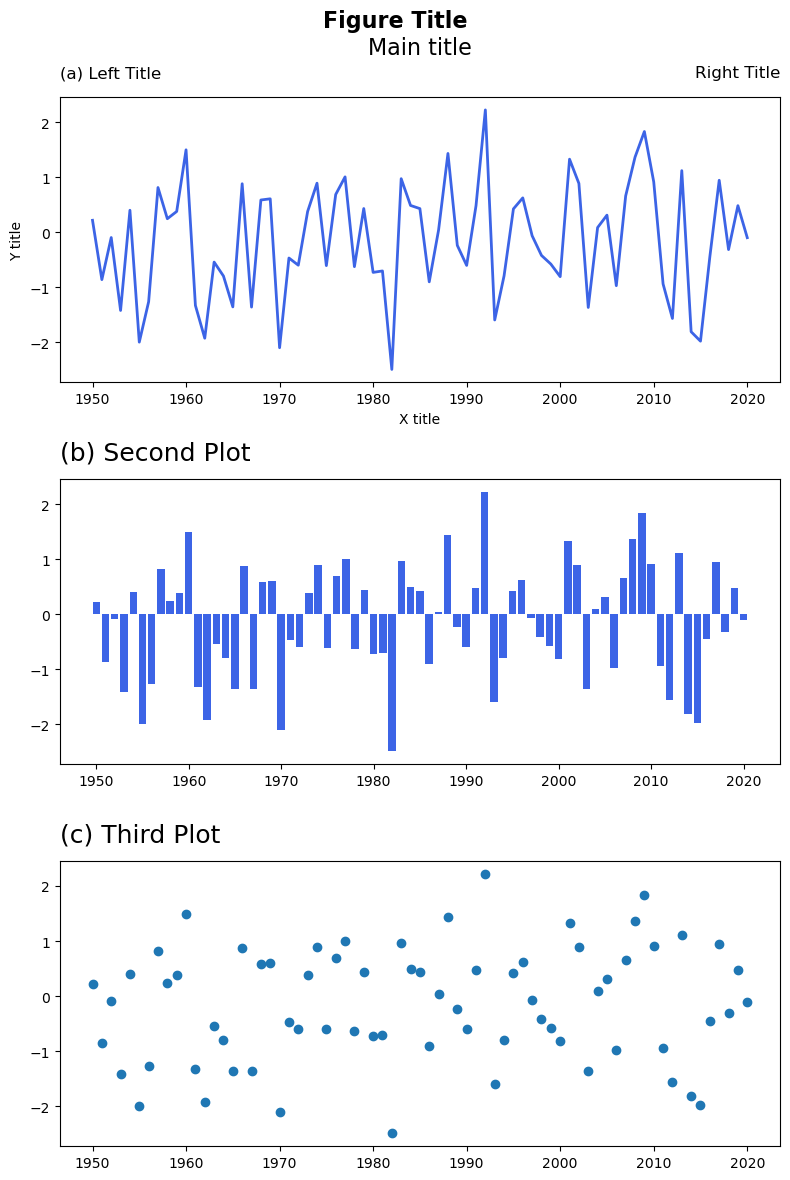

In [4]:
# --- FIGURE PLOT ---
# Layout setting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
col = cmaps.amwg  # Use the AMWG colormap

axes = axes.flatten()  # 🔑 Make it a 1D list of axes

# --- Plot 1 ---
ip = 0
axes[ip].plot(dat.year, dat, label="Label", color=col.colors[4-2], linewidth=2)
gvutil.set_titles_and_labels(axes[ip],
    maintitle="Main title",
    lefttitle="(a) Left Title",
    righttitle="Right Title",
    ylabel="Y title",
    xlabel="X title",
    maintitlefontsize=14,  # Adjust main title font size
    lefttitlefontsize=12,  # Set left title font size
    righttitlefontsize=12,  # Set left title font size
    labelfontsize=10  # Set y-label font size
)

# --- Plot 2 ---
ip = 1
axes[ip].bar(dat.year, dat, label="Label", color=col.colors[4-2], linewidth=2)
gvutil.set_titles_and_labels(axes[ip],
    lefttitle="(b) Second Plot",
)

# --- Plot 3 ---
ip = 2
axes[ip].plot(dat.year, dat, marker="o", linestyle="None", markersize=6)
gvutil.set_titles_and_labels(axes[ip],
    lefttitle="(c) Third Plot",
)


# Apply the overall figure title
fig.suptitle("Figure Title", fontsize=16, fontweight="bold")

# --- OUTPUT ---
plt.tight_layout()
plt.savefig(fnFIG, dpi=300, bbox_inches="tight")
plt.show()